# Task 2: Image quantization

Quantization is a lossy compression technique achieved by compressing a range of values to a single quantum value. Color quantization reduces the number of colors used in an image; this is important for displaying images on devices that support a limited number of colors and for efficiently compressing certain kinds of images.

The clustering algorithms are frequently applied for image quantization. In this task, you have to load the <code>flower.jpg</code> image from [load_sample_image](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_image.html) of [sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).



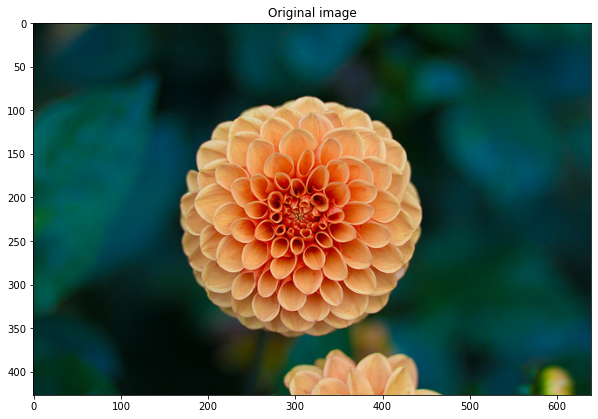

In [52]:
from IPython.display import Image
Image(filename='flower.png', width=600)


In the sequel, quantize the input image by applying k-Means clustering. Perform experiments with different numbers of initial clusters. The result for 8-color quantization must be similar to the following image.


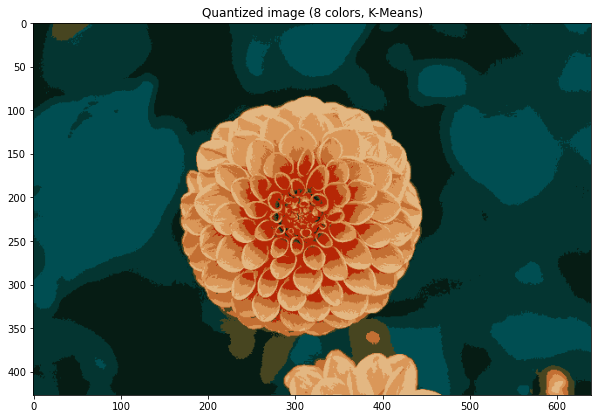

In [53]:
Image(filename='flower8.png', width=600)


[Color Quantization using K-Means](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py)

In [54]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py
import numpy as np
import cv2, os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [55]:
flower = load_sample_image('flower.jpg')
print(type(flower)) # numpy.ndarray
print(flower.dtype) # dtype('uint8')
print(flower.shape) # (427, 640, 3)
print(flower)

<class 'numpy.ndarray'>
uint8
(427, 640, 3)
[[[ 2 19 13]
  [ 3 18 13]
  [ 7 20 13]
  ...
  [ 1 77 64]
  [ 0 76 64]
  [ 0 75 63]]

 [[ 1 18 12]
  [ 3 18 13]
  [ 7 20 13]
  ...
  [ 0 76 64]
  [ 1 74 65]
  [ 1 74 65]]

 [[ 2 17 12]
  [ 6 19 12]
  [ 7 20 13]
  ...
  [ 1 74 65]
  [ 1 74 67]
  [ 1 74 67]]

 ...

 [[ 0 46 40]
  [ 1 48 40]
  [ 1 47 37]
  ...
  [ 5 44 26]
  [ 6 43 26]
  [ 7 44 27]]

 [[ 0 47 41]
  [ 1 48 40]
  [ 1 47 37]
  ...
  [ 6 45 27]
  [ 7 44 27]
  [ 7 44 27]]

 [[ 0 47 41]
  [ 1 48 40]
  [ 0 46 36]
  ...
  [ 7 46 28]
  [ 8 45 28]
  [ 9 43 27]]]


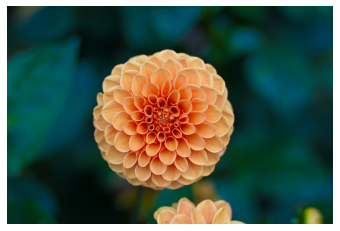

In [56]:
from pylab import *
plt.axis("off")
imshow(flower); # Plot input data/image # cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)
plt.imsave('flowers.jpg', flower)  # save/export image with correct colours

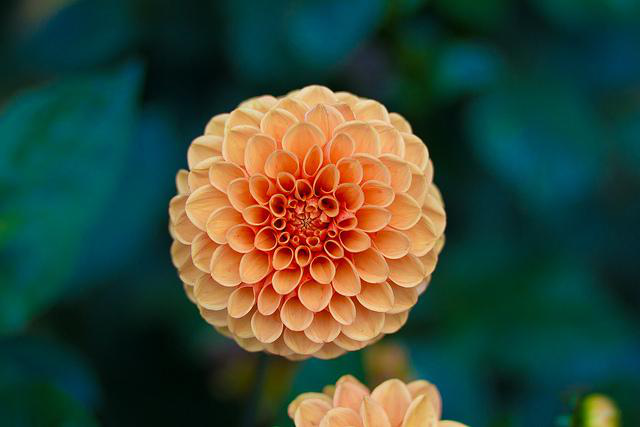

In [57]:
from PIL import Image
Image.open('flowers.jpg')#.show() # show image from local storage

In [58]:
n_colors = 8 # number of clusters/colours
# Convert to floats instead of the default 8 bits integer coding.
# Dividing by 255 is important so that plt.imshow behaves works well on float data (need to be in the range [0-1])
flower = np.array(flower, dtype=np.float64) / 255
print(type(flower)) # numpy.ndarray
print(flower.dtype) # float64
print(flower.shape) # (427, 640, 3)
print(flower)

<class 'numpy.ndarray'>
float64
(427, 640, 3)
[[[0.00784314 0.0745098  0.05098039]
  [0.01176471 0.07058824 0.05098039]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.00392157 0.30196078 0.25098039]
  [0.         0.29803922 0.25098039]
  [0.         0.29411765 0.24705882]]

 [[0.00392157 0.07058824 0.04705882]
  [0.01176471 0.07058824 0.05098039]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.         0.29803922 0.25098039]
  [0.00392157 0.29019608 0.25490196]
  [0.00392157 0.29019608 0.25490196]]

 [[0.00784314 0.06666667 0.04705882]
  [0.02352941 0.0745098  0.04705882]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.00392157 0.29019608 0.25490196]
  [0.00392157 0.29019608 0.2627451 ]
  [0.00392157 0.29019608 0.2627451 ]]

 ...

 [[0.         0.18039216 0.15686275]
  [0.00392157 0.18823529 0.15686275]
  [0.00392157 0.18431373 0.14509804]
  ...
  [0.01960784 0.17254902 0.10196078]
  [0.02352941 0.16862745 0.10196078]
  [0.02745098 0.17254902 0.10588235]]

 [[0.         0.18431373 0.1

In [59]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(flower.shape) # (427, 640, 3)
assert d == 3 # check if the image has 3 channels RGB, else raises an AssertionError
image_array = np.reshape(flower,(w * h, d)) # or np.reshape(flower, (-1, d))
print(type(image_array)) # <class 'numpy.ndarray'>
print(image_array.dtype) # float64
print(image_array.shape) # (273280, 3)
print(image_array)

<class 'numpy.ndarray'>
float64
(273280, 3)
[[0.00784314 0.0745098  0.05098039]
 [0.01176471 0.07058824 0.05098039]
 [0.02745098 0.07843137 0.05098039]
 ...
 [0.02745098 0.18039216 0.10980392]
 [0.03137255 0.17647059 0.10980392]
 [0.03529412 0.16862745 0.10588235]]


In [60]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")
# print(image_array_sample.shape) # (1000, 3)

Fitting model on a small sub-sample of the data
done in 0.041s.


In [61]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (k-means)
done in 0.009s.


In [62]:
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0) # Compute minimum distances between one point and a set of points.
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (random)
done in 0.057s.


In [63]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

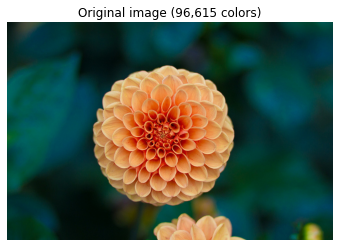

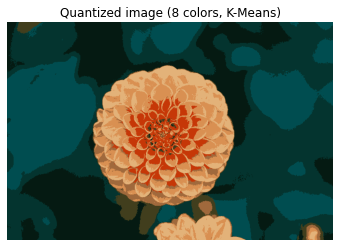

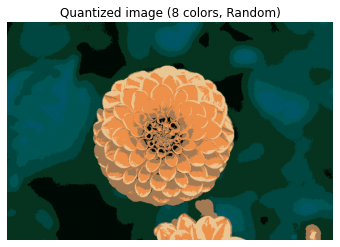

In [64]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(flower)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

### Add more solutions

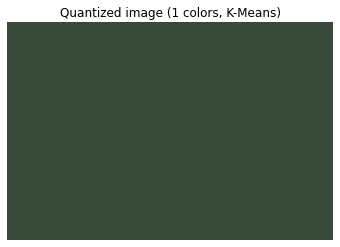

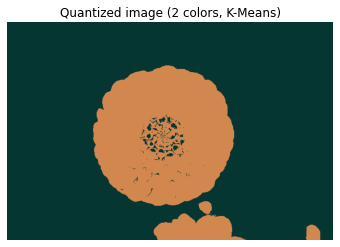

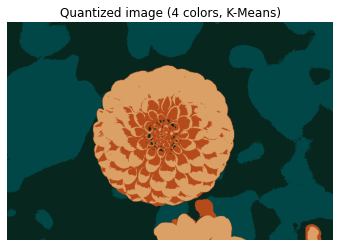

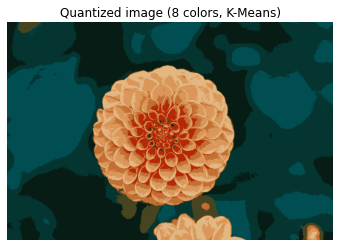

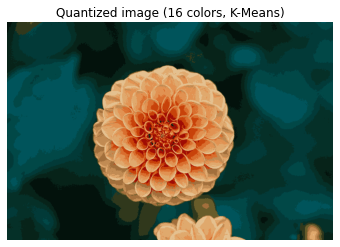

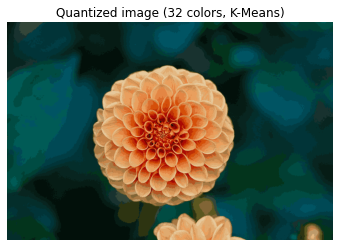

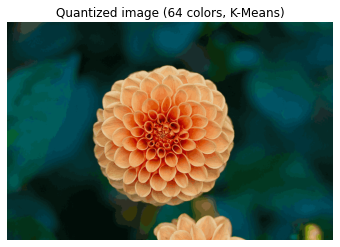

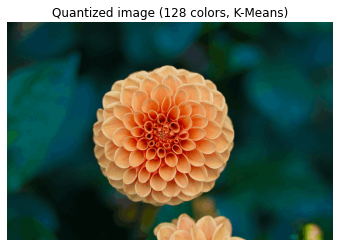

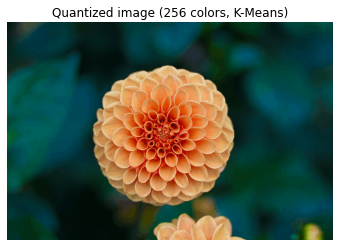

done in 246.766s.


In [65]:
t0 = time()
# [2**i for i in range(0,9)] --> [1, 2, 4, 8, 16, 32, 64, 128, 256]   colors up to 256
for n_colors in [2**i for i in range(0,9)]:
# colors_list = 9 # number of clusters/colours
# for n_colors in range(1,colors_list):
    # print("Fitting model on the full image")
    # t0 = time()
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array)
    # print(f"done in {time() - t0:0.3f}s.")

    # Get labels for all points
    # print("Predicting color indices on the full image (k-means)")
    # t0 = time()
    labels = kmeans.predict(image_array) # assign cluster 0-7
    # print(f"done in {time() - t0:0.3f}s.")
    # print(set(labels)) # {0, 1, 2, 3, 4, 5, 6, 7} --> 8 diff clusters
    # print(labels.shape) # (273280,)
    # print(labels)

    # plt.figure(figsize=(12,6))
    plt.figure(4)
    plt.clf() # just clear the figure
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    plt.show();
print(f"done in {time() - t0:0.3f}s.")

As the number of colors used in an image is increased, the image appears to be more realistic.